<a href="https://colab.research.google.com/github/jonathjd/Education-Project/blob/main/5_0_jd_intital_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis Continued

We will continue our EDA of the cost dataset using pandas. We will also be using some Matplotlib as well.

We will be looking at:
1. Descriptive statistics such as mean, trimmed mean, median, mode for institutions which primarily confer:
- Associates degrees
- Bachelors degrees
- Graduate degrees
 both in the US, Northwest region, and Washington (my current state), and for both public, private for-profit, and private non-profit.
 2. We will generate some visualizations such as histograms, boxplots, and bar charts.

## Columns of interest

 1. **Control**:
 - 1: Public
 - 2: Private non-proft
 - 3: Private for-profit
 2. **Region**:
 - 8: Far West (AK, CA, HI, NV, OR, WA)
 3. **HIGHDEG**:
 - 2: Associates degree
 - 3: Bachelors degree
 - 4: Graduate degree 

In [ ]:
# import libraries
# We'll begin with pandas and import matplotlib, numpy, and scipy as needed.
import pandas as pd

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/jonathjd/Education-Project/main/data/processed/cleaned_data.csv")
df.head()

,UNITID,INSTNM,CITY,STABBR,ZIP,INSTURL,HIGHDEG,CONTROL,REGION,COSTT4_A,TUITIONFEE_IN,TUITIONFEE_OUT,TUITFTE,INEXPFTE,AVGFACSAL
0,100654,Alabama A & M University,Normal,AL,35762,www.aamu.edu/,4,1,5,23053.0,10024.0,18634.0,7870.0,5546.0,7709.0
1,100663,University of Alabama at Birmingham,Birmingham,AL,35294-0110,https://www.uab.edu/,4,1,5,24495.0,8568.0,20400.0,12096.0,14983.0,11049.0
2,100690,Amridge University,Montgomery,AL,36117-3553,www.amridgeuniversity.edu/,4,2,5,14800.0,6950.0,6950.0,16403.0,5245.0,4187.0
3,100706,University of Alabama in Huntsville,Huntsville,AL,35899,www.uah.edu/,4,1,5,23917.0,11122.0,23518.0,8275.0,8488.0,9688.0
4,100724,Alabama State University,Montgomery,AL,36104-0271,www.alasu.edu/,4,1,5,21866.0,11068.0,19396.0,9587.0,9346.0,7221.0


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
UNITID,3946.0,236362.039280,118013.339610,100654.0,155629.25,198631.000000,237063.750,494852.0
HIGHDEG,3946.0,3.158388,0.894995,2.0,2.00,3.000000,4.000,4.0
CONTROL,3946.0,1.753168,0.719031,1.0,1.00,2.000000,2.000,3.0
REGION,3946.0,4.471363,2.122919,0.0,3.00,5.000000,6.000,8.0
COSTT4_A,3946.0,28040.147238,15662.719280,6525.0,15403.80,24000.000000,36389.875,78555.0
TUITIONFEE_IN,3946.0,16391.476432,13837.107108,480.0,5604.75,11994.500000,23408.750,61788.0
TUITIONFEE_OUT,3946.0,19698.498860,12755.145053,480.0,9733.75,15762.666667,27203.750,61788.0
TUITFTE,3946.0,11572.383933,11669.078887,0.0,4195.75,9882.000000,15639.500,440373.0
INEXPFTE,3946.0,10316.409022,16075.745133,0.0,5041.00,7331.500000,10861.000,497549.0
AVGFACSAL,3946.0,7063.467562,2542.040241,527.0,5394.25,6773.000000,8403.500,21150.0


In [ ]:
# Create new df separating all institutions into the degree they primarily grant
us_associates_df = df[df["HIGHDEG"] == 2].copy()
us_associates_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
UNITID,1317.0,244287.987092,123261.404275,100760.0,155858.0,199856.0,366261.0,494852.0
HIGHDEG,1317.0,2.000000,0.000000,2.0,2.0,2.0,2.0,2.0
CONTROL,1317.0,1.590737,0.871015,1.0,1.0,1.0,3.0,3.0
REGION,1317.0,4.751708,2.012463,1.0,3.0,5.0,6.0,8.0
COSTT4_A,1317.0,17667.568048,8646.705979,7338.0,11936.0,14379.0,21080.0,70939.0
TUITIONFEE_IN,1317.0,7600.870231,6933.620241,932.0,3236.0,4800.0,10645.0,56016.5
TUITIONFEE_OUT,1317.0,11046.705982,6126.886207,932.0,6972.0,9370.0,14019.0,56016.5
TUITFTE,1317.0,5897.785877,5783.308665,215.0,2023.0,3561.0,9012.0,65766.0
INEXPFTE,1317.0,6263.754366,3392.174532,453.0,4346.0,5631.0,7468.0,46910.0
AVGFACSAL,1317.0,6187.424272,1947.238597,1194.0,4848.0,6000.0,7421.0,14583.0


In [ ]:
# trimmed mean
from scipy.stats import trim_mean
trim_mean(us_associates_df["COSTT4_A"], 0.1)

16235.325804558792

In [ ]:
# Median
us_associates_df["COSTT4_A"].median()

14379.0

In [ ]:
# mode
us_associates_df["COSTT4_A"].mode()

0    11349.0
dtype: float64

In [ ]:
us_bachelors_df = df[df["HIGHDEG"] == 3].copy()
us_bachelors_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
UNITID,687.0,254633.224163,128266.251175,100937.0,157447.000000,203535.0,384337.5,494737.0
HIGHDEG,687.0,3.000000,0.000000,3.0,3.000000,3.0,3.0,3.0
CONTROL,687.0,1.919942,0.675041,1.0,1.000000,2.0,2.0,3.0
REGION,687.0,4.427948,2.174656,0.0,2.000000,5.0,6.0,8.0
COSTT4_A,687.0,29524.097738,16391.918654,6525.0,17182.000000,25406.0,36471.5,76953.0
TUITIONFEE_IN,687.0,18241.374090,14495.518529,480.0,7690.000000,14354.0,23274.5,58800.0
TUITIONFEE_OUT,687.0,20162.736293,13494.368114,480.0,10583.166667,15477.0,24855.5,58800.0
TUITFTE,687.0,12165.744541,8722.859421,0.0,5815.500000,10875.0,17064.5,66251.0
INEXPFTE,687.0,9462.368268,8613.261678,209.0,4780.500000,6948.0,11032.0,94758.0
AVGFACSAL,687.0,6377.887686,2293.100696,527.0,4903.000000,6133.0,7679.5,14733.0


# Descriptive Statistics

In [ ]:
# trimmed mean
trim_mean(us_bachelors_df["COSTT4_A"], 0.1)

27326.264071182013

In [ ]:
# median
us_bachelors_df["COSTT4_A"].median()

25406.0

In [ ]:
# mode
us_bachelors_df["COSTT4_A"].mode()

0    23766.0
1    39815.0
dtype: float64

In [ ]:
us_graduate_df = df[df["HIGHDEG"] == 4].copy()
us_graduate_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
UNITID,1942.0,224523.328012,109039.240685,100654.0,155034.000,195088.5,229008.75,494551.0
HIGHDEG,1942.0,4.000000,0.000000,4.0,4.000,4.0,4.00,4.0
CONTROL,1942.0,1.804325,0.587366,1.0,1.000,2.0,2.00,3.0
REGION,1942.0,4.296601,2.158238,0.0,2.000,4.0,6.00,8.0
COSTT4_A,1942.0,34549.525610,15387.463847,8588.0,22257.500,29900.0,44684.00,78555.0
TUITIONFEE_IN,1942.0,21698.556079,14158.590320,1050.0,9630.500,16876.0,31909.00,61788.0
TUITIONFEE_OUT,1942.0,25401.629706,12547.929869,1050.0,15442.500,23378.0,33419.00,61788.0
TUITFTE,1942.0,15210.801493,13855.235338,0.0,8549.250,12911.5,18581.75,440373.0
INEXPFTE,1942.0,13366.909629,21691.310460,0.0,6586.250,9201.0,13403.50,497549.0
AVGFACSAL,1942.0,7900.101129,2705.003833,538.0,6234.875,7544.0,9264.75,21150.0


In [ ]:
# trimmed mean
trim_mean(us_graduate_df["COSTT4_A"], 0.1)

33010.57432633714

In [ ]:
# median
us_graduate_df["COSTT4_A"].median()

29900.0

In [ ]:
# mode
us_graduate_df["COSTT4_A"].mode()

0    28149.0
dtype: float64

### Descriptives:
The mean/median/mode cost of attendance for one year at an instituiton which primarily confers:
1. Associates degrees: 17,667 / 14,379 / 11,349
2. Bachelors degrees: 29,529 / $25,406 / 23,776
3. Graduate degrees: 34,549 / 29,990 / 28,149

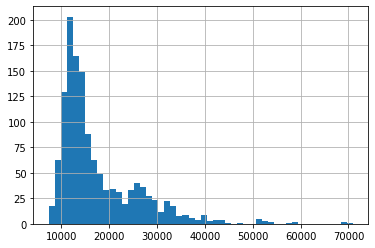

In [ ]:
us_associates_df["COSTT4_A"].hist(bins=50)

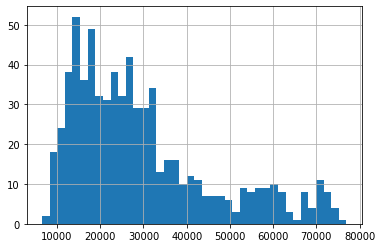

In [ ]:
us_bachelors_df["COSTT4_A"].hist(bins=40)

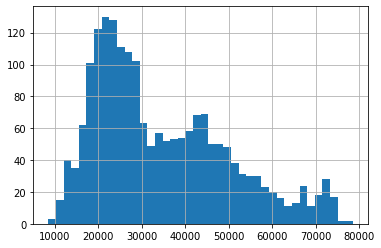

In [ ]:
us_graduate_df["COSTT4_A"].hist(bins=40)

In [ ]:
#What is the variance in the cost of attendance?
from statistics import variance

variance(us_associates_df["COSTT4_A"])

74765524.28360748

In [ ]:
variance(us_bachelors_df["COSTT4_A"])

268694997.1605992

In [ ]:
variance(us_graduate_df["COSTT4_A"])

236774043.6472517

In [ ]:
#Standard deviation
from statistics import stdev

stdev(us_associates_df["COSTT4_A"])

8646.705978787963

In [ ]:
stdev(us_bachelors_df["COSTT4_A"])

16391.918654038007

In [ ]:
stdev(us_graduate_df["COSTT4_A"])

15387.463847146862

In [ ]:
# Mean absolute deviation
import numpy as np

np.mean(np.absolute(us_associates_df["COSTT4_A"] - np.mean(us_associates_df["COSTT4_A"])))

6500.3476821685335

# Seaborn Visualizations

In [ ]:
# Let's visuaze these histograms using seaborn and the "hue" parameter

# import seaborn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

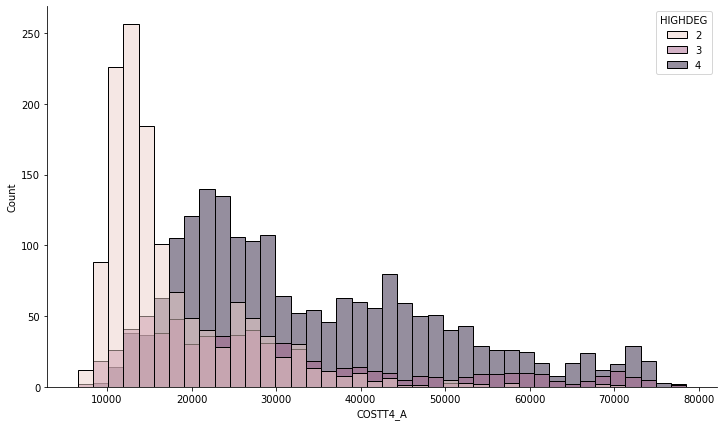

In [ ]:

# make figure
fig = plt.figure(figsize=(12,7))
fig = sns.histplot(data=df, x="COSTT4_A", hue="HIGHDEG", bins=40)

# set style
sns.set_style(style="ticks")
sns.despine()


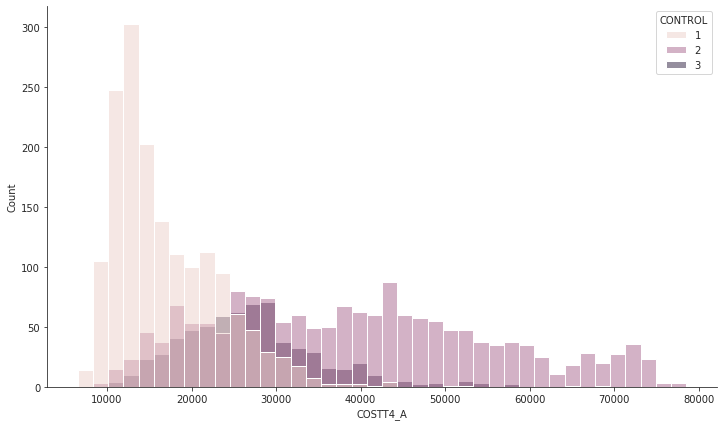

In [ ]:
# make figure
fig = plt.figure(figsize=(12,7))
fig = sns.histplot(data=df, x="COSTT4_A", hue="CONTROL", bins=40)

# set style
sns.set_style(style="ticks")
sns.despine()

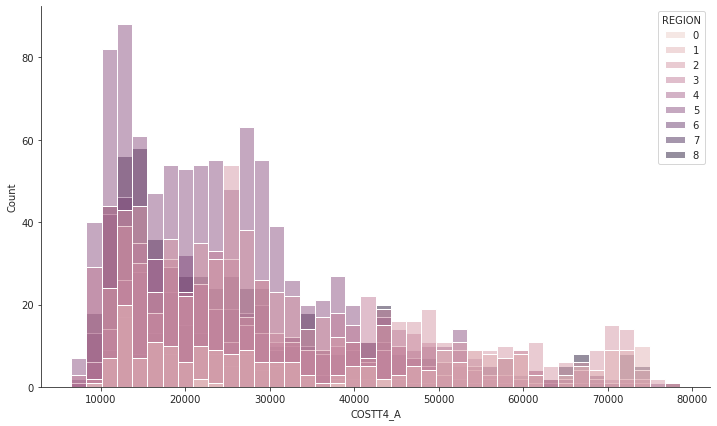

In [ ]:
# make figure
fig = plt.figure(figsize=(12,7))
fig = sns.histplot(data=df, x="COSTT4_A", hue="REGION", bins=40)

# set style
sns.set_style(style="ticks")
sns.despine()

- It seems as if there is a higher density of instituions between ~10k and ~35k in region 6 but this isnt clear, let's try and put some numbers to these estimates.

In [ ]:
def proportion(dataframe, col, upper_bound: int, lower_bound: int, hue=None):
  """
  Returns None.

  Keyword Arguments:
  dataframe -- dataframe
  col -- column dataType = str
  upper_bound -- the upper bound
  lower_bound -- the lower bound
  hue --- how to categorize the data dataType = str (default=None)
  """

  # Grab whole subset
  whole_subset = dataframe[(dataframe[col] >= lower_bound) & (dataframe[col] <= upper_bound)]

  if hue == None: # if no hue is defined
    proportion = round(whole_subset[col].count() / df[col].count(), 2) * 100
    print(f"The proportion of the data that falls within the upper and lower bounds is {proportion}%")
  
  else: # if hue is defined
    hue_subset = whole_subset.groupby(by=hue).count()
    for i in range(len(hue_subset)):
      proportion = round(hue_subset[col].iloc[i] / whole_subset[col].count(), 4) * 100
      print(f"The proportion of schools between ${lower_bound} and ${upper_bound} in {hue} {i} is:")
      print(f"{proportion}%")
      print("\n")
    return hue_subset[col]

In [ ]:
proportion(df, col="COSTT4_A", lower_bound=10000, upper_bound=25000, hue="REGION")

The proportion of schools between $10000 and $25000 in REGION 0 is:
0.15%


The proportion of schools between $10000 and $25000 in REGION 1 is:
4.19%


The proportion of schools between $10000 and $25000 in REGION 2 is:
13.63%


The proportion of schools between $10000 and $25000 in REGION 3 is:
12.870000000000001%


The proportion of schools between $10000 and $25000 in REGION 4 is:
10.5%


The proportion of schools between $10000 and $25000 in REGION 5 is:
26.0%


The proportion of schools between $10000 and $25000 in REGION 6 is:
12.27%


The proportion of schools between $10000 and $25000 in REGION 7 is:
4.64%


The proportion of schools between $10000 and $25000 in REGION 8 is:
15.75%




REGION
0      3
1     83
2    270
3    255
4    208
5    515
6    243
7     92
8    312
Name: COSTT4_A, dtype: int64

Region 5 (**Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC, TN, VA, WV**) has the highest proportion of schools with a cost of tuition between 10k and 35k

- 25% of the schools in region 5 are between 10k and 35k per year.

In [ ]:
# using control as the hue
proportion(df, col="COSTT4_A", lower_bound=10000, upper_bound=20000, hue="CONTROL")

The proportion of schools between $10000 and $20000 in CONTROL 0 is:
75.79%


The proportion of schools between $10000 and $20000 in CONTROL 1 is:
15.21%


The proportion of schools between $10000 and $20000 in CONTROL 2 is:
9.0%




CONTROL
1    1061
2     213
3     126
Name: COSTT4_A, dtype: int64

- More than half of the public universities in the US cost between 10k and 35k for attendance for 1 year

In [ ]:
# using high degree as the hue
proportion(df, col="COSTT4_A", lower_bound=20000, upper_bound=35000, hue="HIGHDEG")

The proportion of schools between $20000 and $35000 in HIGHDEG 0 is:
21.740000000000002%


The proportion of schools between $20000 and $35000 in HIGHDEG 1 is:
19.06%


The proportion of schools between $20000 and $35000 in HIGHDEG 2 is:
59.199999999999996%




HIGHDEG
2    300
3    263
4    817
Name: COSTT4_A, dtype: int64

In [ ]:
# using stabbr as hue
proportion(df, col="COSTT4_A", lower_bound=10000, upper_bound=20000, hue="STABBR")

The proportion of schools between $10000 and $20000 in STABBR 0 is:
0.21%


The proportion of schools between $10000 and $20000 in STABBR 1 is:
1.79%


The proportion of schools between $10000 and $20000 in STABBR 2 is:
1.9300000000000002%


The proportion of schools between $10000 and $20000 in STABBR 3 is:
2.07%


The proportion of schools between $10000 and $20000 in STABBR 4 is:
11.360000000000001%


The proportion of schools between $10000 and $20000 in STABBR 5 is:
1.5699999999999998%


The proportion of schools between $10000 and $20000 in STABBR 6 is:
1.21%


The proportion of schools between $10000 and $20000 in STABBR 7 is:
0.06999999999999999%


The proportion of schools between $10000 and $20000 in STABBR 8 is:
0.13999999999999999%


The proportion of schools between $10000 and $20000 in STABBR 9 is:
2.71%


The proportion of schools between $10000 and $20000 in STABBR 10 is:
2.79%


The proportion of schools between $10000 and $20000 in STABBR 11 is:
0.7100000000000001%




STABBR
AK      3
AL     25
AR     27
AZ     29
CA    159
CO     22
CT     17
DC      1
DE      2
FL     38
GA     39
HI     10
IA     16
ID      6
IL     51
IN     17
KS     31
KY     25
LA     23
MA     20
MD     18
ME     13
MI     27
MN     41
MO     31
MS     16
MT     17
NC     67
ND     14
NE     11
NH      5
NJ     36
NM     25
NV      8
NY     97
OH     45
OK     22
OR     18
PA     28
RI      3
SC     22
SD      6
TN     22
TX    100
UT     12
VA     32
VT      2
WA     40
WI     32
WV     21
WY      8
Name: COSTT4_A, dtype: int64

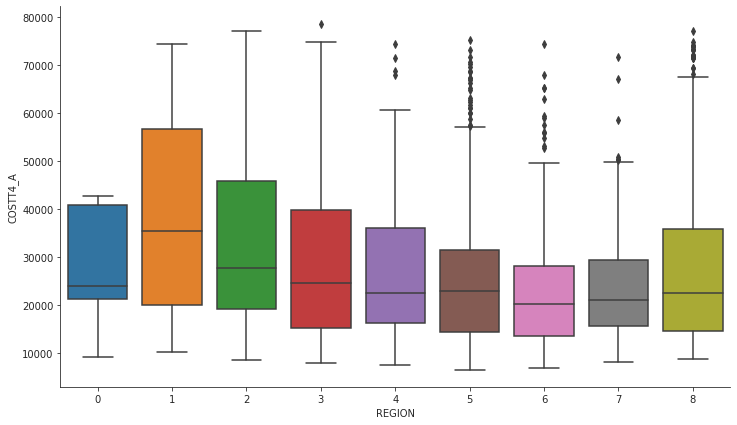

In [ ]:
# make figure
fig = plt.figure(figsize=(12,7))
fig = sns.boxplot(data=df, x="REGION", y="COSTT4_A")

# set style
sns.set_style(style="ticks")
sns.despine()

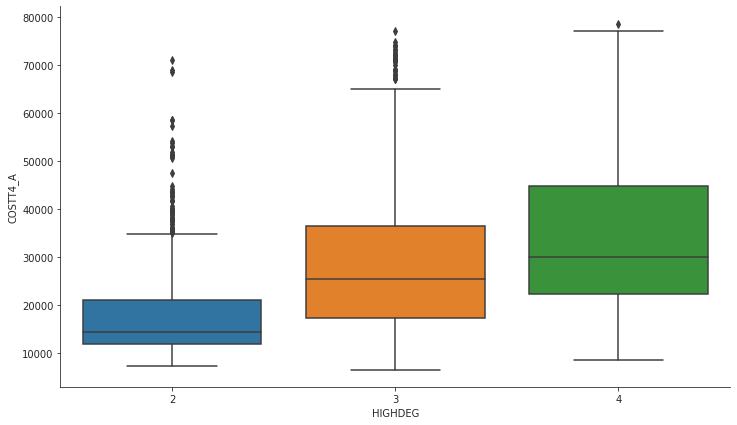

In [ ]:
# make figure
fig = plt.figure(figsize=(12,7))
fig = sns.boxplot(data=df, x="HIGHDEG", y="COSTT4_A")

# set style
sns.set_style(style="ticks")
sns.despine()


- it looks like instituitions which primarily award associates degrees are heavily positively skewed

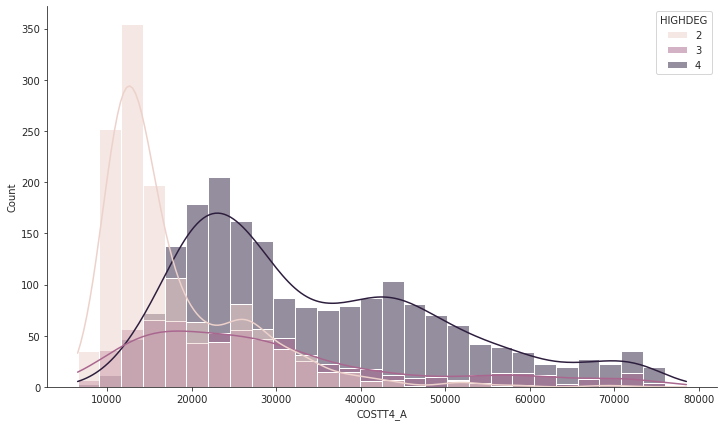

In [ ]:
# make figure
fig = plt.figure(figsize=(12,7))
fig = sns.histplot(data=df, x="COSTT4_A", hue="HIGHDEG", kde=True)

# set style
sns.set_style(style="ticks")
sns.despine()

# Plotly Visualizations